# Precificador Imobiliário

## Bibliotecas

In [147]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Carregamendo da Base

In [148]:
df = pd.read_csv('imoveis.csv')
df

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,regiao,...,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo,Latitude,Longitude
0,SQNW 310 Bloco B,5100.0,76.0,67.105263,2,1,2,409,791,NOROESTE,...,0,0,0,0,0,0,0,Apartamento,-15.744342,-47.912500
1,SQNW 302,8500.0,69.0,123.188406,2,2,2,SemInformacao,SemInformacao,NOROESTE,...,0,0,0,1,0,0,0,Apartamento,-15.768450,-47.910646
2,SCRN 708/709,1620.0,31.0,52.258065,1,1,1,781,410,ASA NORTE,...,0,0,0,0,0,0,0,Kitnet,-15.763582,-47.892389
3,SQS 316,9000.0,240.0,37.500000,4,1,2,SemInformacao,2400,ASA SUL,...,0,0,0,1,0,0,0,Apartamento,-15.829897,-47.927249
4,SQNW 309 Bloco D,11000.0,155.0,70.967742,4,1,2,1319,1845,NOROESTE,...,0,0,0,0,0,0,0,Apartamento,-15.746442,-47.912663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58045,SHIS QI 7,12900000.0,650.0,19846.153846,4,4,4,SemInformacao,SemInformacao,LAGO SUL,...,0,0,0,0,0,0,0,Casa,-15.844132,-47.891195
58046,SHIS QL 10,18500000.0,850.0,21764.705882,5,5,6,SemInformacao,SemInformacao,LAGO SUL,...,0,0,0,0,0,0,0,Casa,-15.829325,-47.872777
58047,SHA Conjunto 5 Chacará 19A,1500000.0,500.0,3000.000000,4,3,3,SemInformacao,SemInformacao,ARNIQUEIRA,...,0,0,0,0,0,0,0,Casa,31.197678,121.334483
58048,Condomínio Santa Felicidade,1340000.0,250.0,5360.000000,3,3,2,SemInformacao,750,JARDIM BOTANICO,...,0,0,0,0,0,0,0,Casa,-15.572722,-47.333241


## Tratamento da Base

### Aluguel

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58050 entries, 0 to 58049
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Título                   58050 non-null  object 
 1   Valor                    58050 non-null  float64
 2   area                     58050 non-null  float64
 3   Valor_metro              58050 non-null  float64
 4   quartos                  58050 non-null  int64  
 5   suites                   58050 non-null  int64  
 6   garagem                  58050 non-null  int64  
 7   iptu                     58050 non-null  object 
 8   condominio               58050 non-null  object 
 9   regiao                   58050 non-null  object 
 10  cidade                   58050 non-null  object 
 11  imobiliaria              58050 non-null  object 
 12  creci                    58050 non-null  object 
 13  operacao                 58050 non-null  object 
 14  Aquecimento Solar     

In [150]:
df.operacao.value_counts()

operacao
venda      57120
aluguel      930
Name: count, dtype: int64

In [151]:
# Filtrando os registros onde operacao = aluguel
df_aluguel = df.loc[df['operacao'] == 'aluguel']

# Filtrando os registros onde operacao = venda
df_venda = df.loc[df['operacao'] == 'venda']

In [152]:
# # Lista com todas as colunas
todas_colunas = df_aluguel.columns.tolist()

# Excluindo as duas colunas que você não deseja
colunas_a_excluir = ['Título', 'Valor','Latitude','Longitude','area','Valor_metro']  # Substitua 'colunaX' e 'colunaY' pelos nomes das colunas que deseja excluir
colunas_filtradas = [coluna for coluna in todas_colunas if coluna not in colunas_a_excluir]
colunas_filtradas

['quartos',
 'suites',
 'garagem',
 'iptu',
 'condominio',
 'regiao',
 'cidade',
 'imobiliaria',
 'creci',
 'operacao',
 'Aquecimento Solar',
 'Circuito de TV',
 'Gerador de Energia',
 'Piscina',
 'Sala de Ginástica',
 'Varanda',
 'Cozinha Espaçosa',
 'Ar Condicionado',
 'Cobertura Coletiva',
 'Guarita',
 'PlayGround',
 'Salão de Festas',
 'Projeto de Iluminação',
 'Pintura Nova',
 'Área de Lazer',
 'Interfone',
 'Mobiliado',
 'Área de Serviço',
 'Brinquedoteca',
 'Churrasqueira',
 'Cozinha com Armários',
 'Despensa',
 'Escritório',
 'Gás Canalizado',
 'Jardim',
 'Lavabo',
 'Lazer no Pilotis',
 'Poço Artesiano',
 'Portão Eletrônico',
 'Quadra Esportiva',
 'Sala de Jogos',
 'Salão de Jogos',
 'Salão Gourmet',
 'Sauna',
 'SPA',
 'Área de Serviço Coberta',
 'Piso em Porcelanato',
 'Vista Livre',
 'Home Theater',
 'Aceita Pet',
 'Academia',
 'tipo']

In [153]:
# Iterando sobre cada coluna e imprimindo seus value counts
for i in colunas_filtradas:
    print(f'Value counts para a coluna {i}:')
    print(df_aluguel[i].value_counts())
    print('\n')

Value counts para a coluna quartos:
quartos
1    372
4    217
2    186
3    155
Name: count, dtype: int64


Value counts para a coluna suites:
suites
1    558
2    155
3     93
0     62
4     62
Name: count, dtype: int64


Value counts para a coluna garagem:
garagem
1    496
2    248
3     62
4     62
0     31
5     31
Name: count, dtype: int64


Value counts para a coluna iptu:
iptu
SemInformacao    527
409               31
781               31
1319              31
570               31
5067              31
432               31
352               31
56                31
405               31
2500              31
2601              31
1220              31
272               31
Name: count, dtype: int64


Value counts para a coluna condominio:
condominio
SemInformacao    186
410              155
1100              62
600               62
3200              31
1450              31
690               31
750               31
1350              31
1800              31
2500              31
791       

In [154]:
df_aluguel

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,regiao,...,SPA,Área de Serviço Coberta,Piso em Porcelanato,Vista Livre,Home Theater,Aceita Pet,Academia,tipo,Latitude,Longitude
0,SQNW 310 Bloco B,5100.0,76.0,67.105263,2,1,2,409,791,NOROESTE,...,0,0,0,0,0,0,0,Apartamento,-15.744342,-47.912500
1,SQNW 302,8500.0,69.0,123.188406,2,2,2,SemInformacao,SemInformacao,NOROESTE,...,0,0,0,1,0,0,0,Apartamento,-15.768450,-47.910646
2,SCRN 708/709,1620.0,31.0,52.258065,1,1,1,781,410,ASA NORTE,...,0,0,0,0,0,0,0,Kitnet,-15.763582,-47.892389
3,SQS 316,9000.0,240.0,37.500000,4,1,2,SemInformacao,2400,ASA SUL,...,0,0,0,1,0,0,0,Apartamento,-15.829897,-47.927249
4,SQNW 309 Bloco D,11000.0,155.0,70.967742,4,1,2,1319,1845,NOROESTE,...,0,0,0,0,0,0,0,Apartamento,-15.746442,-47.912663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,CLNW 2/3 Lote K - Ed. Icone Noroeste,4320.0,48.0,90.000000,2,1,1,SemInformacao,SemInformacao,NOROESTE,...,0,0,0,0,0,0,0,Apartamento,-15.760204,-47.910740
926,SQNW 103 Bloco B,5600.0,77.0,72.727273,2,1,1,2601,SemInformacao,NOROESTE,...,0,0,0,0,0,0,0,Apartamento,-15.764111,-47.908951
927,SHCGN 703 Bloco R,2665.0,39.0,68.333333,1,0,1,1220,690,ASA NORTE,...,0,0,0,1,0,0,0,Apartamento,-15.764934,-47.893420
928,SQSW 305 Bloco J,9000.0,182.0,49.450549,4,2,3,SemInformacao,1450,SUDOESTE,...,0,0,0,0,0,0,0,Apartamento,-15.804064,-47.931765


In [155]:
# excluindo colunas que só tem 0 
# Lista de colunas a serem removidas
colunas_remover = ['Circuito de TV', 'Ar Condicionado', 'Cobertura Coletiva', 
                   'Brinquedoteca', 'Churrasqueira', 'Cozinha com Armários', 
                   'Despensa', 'Escritório', 'Gás Canalizado', 
                   'Quadra Esportiva', 'Salão Gourmet', 
                   'Área de Serviço Coberta', 'Piso em Porcelanato', 
                   'Aceita Pet', 'Academia', 'operacao']

# Removendo as colunas do DataFrame
df_aluguel = df_aluguel.drop(columns=colunas_remover)
df_aluguel

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,regiao,...,Portão Eletrônico,Sala de Jogos,Salão de Jogos,Sauna,SPA,Vista Livre,Home Theater,tipo,Latitude,Longitude
0,SQNW 310 Bloco B,5100.0,76.0,67.105263,2,1,2,409,791,NOROESTE,...,0,0,0,1,0,0,0,Apartamento,-15.744342,-47.912500
1,SQNW 302,8500.0,69.0,123.188406,2,2,2,SemInformacao,SemInformacao,NOROESTE,...,0,0,0,0,0,1,0,Apartamento,-15.768450,-47.910646
2,SCRN 708/709,1620.0,31.0,52.258065,1,1,1,781,410,ASA NORTE,...,0,0,0,0,0,0,0,Kitnet,-15.763582,-47.892389
3,SQS 316,9000.0,240.0,37.500000,4,1,2,SemInformacao,2400,ASA SUL,...,0,0,0,0,0,1,0,Apartamento,-15.829897,-47.927249
4,SQNW 309 Bloco D,11000.0,155.0,70.967742,4,1,2,1319,1845,NOROESTE,...,1,0,0,1,0,0,0,Apartamento,-15.746442,-47.912663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,CLNW 2/3 Lote K - Ed. Icone Noroeste,4320.0,48.0,90.000000,2,1,1,SemInformacao,SemInformacao,NOROESTE,...,0,0,0,0,0,0,0,Apartamento,-15.760204,-47.910740
926,SQNW 103 Bloco B,5600.0,77.0,72.727273,2,1,1,2601,SemInformacao,NOROESTE,...,0,0,0,1,0,0,0,Apartamento,-15.764111,-47.908951
927,SHCGN 703 Bloco R,2665.0,39.0,68.333333,1,0,1,1220,690,ASA NORTE,...,1,1,0,0,0,1,0,Apartamento,-15.764934,-47.893420
928,SQSW 305 Bloco J,9000.0,182.0,49.450549,4,2,3,SemInformacao,1450,SUDOESTE,...,0,0,0,0,0,0,0,Apartamento,-15.804064,-47.931765


In [156]:
df_aluguel['iptu'] = pd.to_numeric(df['iptu'], errors='coerce')
df_aluguel['condominio'] = pd.to_numeric(df['condominio'], errors='coerce')


# Calcular a mediana de cada coluna
mediana_iptu = df_aluguel['iptu'].median()
mediana_condominio = df_aluguel['condominio'].median()

# Preencher os valores NaN nas colunas com as medianas correspondentes
df_aluguel['iptu'].fillna(mediana_iptu, inplace=True)
df_aluguel['condominio'].fillna(mediana_condominio, inplace=True)
df_aluguel

C:\Users\engra\AppData\Local\Temp\ipykernel_13760\153936575.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_aluguel['iptu'].fillna(mediana_iptu, inplace=True)
C:\Users\engra\AppData\Local\Temp\ipykernel_13760\153936575.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,regiao,...,Portão Eletrônico,Sala de Jogos,Salão de Jogos,Sauna,SPA,Vista Livre,Home Theater,tipo,Latitude,Longitude
0,SQNW 310 Bloco B,5100.0,76.0,67.105263,2,1,2,409.0,791.0,NOROESTE,...,0,0,0,1,0,0,0,Apartamento,-15.744342,-47.912500
1,SQNW 302,8500.0,69.0,123.188406,2,2,2,570.0,1100.0,NOROESTE,...,0,0,0,0,0,1,0,Apartamento,-15.768450,-47.910646
2,SCRN 708/709,1620.0,31.0,52.258065,1,1,1,781.0,410.0,ASA NORTE,...,0,0,0,0,0,0,0,Kitnet,-15.763582,-47.892389
3,SQS 316,9000.0,240.0,37.500000,4,1,2,570.0,2400.0,ASA SUL,...,0,0,0,0,0,1,0,Apartamento,-15.829897,-47.927249
4,SQNW 309 Bloco D,11000.0,155.0,70.967742,4,1,2,1319.0,1845.0,NOROESTE,...,1,0,0,1,0,0,0,Apartamento,-15.746442,-47.912663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,CLNW 2/3 Lote K - Ed. Icone Noroeste,4320.0,48.0,90.000000,2,1,1,570.0,1100.0,NOROESTE,...,0,0,0,0,0,0,0,Apartamento,-15.760204,-47.910740
926,SQNW 103 Bloco B,5600.0,77.0,72.727273,2,1,1,2601.0,1100.0,NOROESTE,...,0,0,0,1,0,0,0,Apartamento,-15.764111,-47.908951
927,SHCGN 703 Bloco R,2665.0,39.0,68.333333,1,0,1,1220.0,690.0,ASA NORTE,...,1,1,0,0,0,1,0,Apartamento,-15.764934,-47.893420
928,SQSW 305 Bloco J,9000.0,182.0,49.450549,4,2,3,570.0,1450.0,SUDOESTE,...,0,0,0,0,0,0,0,Apartamento,-15.804064,-47.931765


In [157]:
# retirar mais colunas que nao farão sentido no modelo
df_aluguel = df_aluguel.drop(['Título','Valor_metro','Latitude','Longitude'],axis=1)
df_aluguel

,Valor,area,quartos,suites,garagem,iptu,condominio,regiao,cidade,imobiliaria,...,Lazer no Pilotis,Poço Artesiano,Portão Eletrônico,Sala de Jogos,Salão de Jogos,Sauna,SPA,Vista Livre,Home Theater,tipo
0,5100.0,76.0,2,1,2,409.0,791.0,NOROESTE,BRASÍLIA - NOROESTE,Artiaga Imóveis,...,0,0,0,0,0,1,0,0,0,Apartamento
1,8500.0,69.0,2,2,2,570.0,1100.0,NOROESTE,BRASÍLIA - NOROESTE,Neves Teixeira Imóveis,...,0,0,0,0,0,0,0,1,0,Apartamento
2,1620.0,31.0,1,1,1,781.0,410.0,ASA NORTE,BRASÍLIA - ASA NORTE,Granville Negócios Imobiliários,...,0,0,0,0,0,0,0,0,0,Kitnet
3,9000.0,240.0,4,1,2,570.0,2400.0,ASA SUL,BRASÍLIA - ASA SUL,Brandt imóveis,...,0,0,0,0,0,0,0,1,0,Apartamento
4,11000.0,155.0,4,1,2,1319.0,1845.0,NOROESTE,BRASÍLIA - NOROESTE,Park Imob,...,0,0,1,0,0,1,0,0,0,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,4320.0,48.0,2,1,1,570.0,1100.0,NOROESTE,BRASÍLIA - NOROESTE,WRP MALL Imóveis,...,0,0,0,0,0,0,0,0,0,Apartamento
926,5600.0,77.0,2,1,1,2601.0,1100.0,NOROESTE,BRASÍLIA - NOROESTE,FGM Imóveis,...,0,0,0,0,0,1,0,0,0,Apartamento
927,2665.0,39.0,1,0,1,1220.0,690.0,ASA NORTE,BRASÍLIA - ASA NORTE,Construtora Santa Tereza,...,1,0,1,1,0,0,0,1,0,Apartamento
928,9000.0,182.0,4,2,3,570.0,1450.0,SUDOESTE,BRASÍLIA - SUDOESTE,RE/MAX Prime,...,0,0,0,0,0,0,0,0,0,Apartamento


### Venda

In [158]:
# # Lista com todas as colunas
todas_colunas = df_venda.columns.tolist()

# Excluindo as duas colunas que você não deseja
colunas_a_excluir = ['Título', 'Valor','Latitude','Longitude','area','Valor_metro']  # Substitua 'colunaX' e 'colunaY' pelos nomes das colunas que deseja excluir
colunas_filtradas = [coluna for coluna in todas_colunas if coluna not in colunas_a_excluir]
colunas_filtradas

['quartos',
 'suites',
 'garagem',
 'iptu',
 'condominio',
 'regiao',
 'cidade',
 'imobiliaria',
 'creci',
 'operacao',
 'Aquecimento Solar',
 'Circuito de TV',
 'Gerador de Energia',
 'Piscina',
 'Sala de Ginástica',
 'Varanda',
 'Cozinha Espaçosa',
 'Ar Condicionado',
 'Cobertura Coletiva',
 'Guarita',
 'PlayGround',
 'Salão de Festas',
 'Projeto de Iluminação',
 'Pintura Nova',
 'Área de Lazer',
 'Interfone',
 'Mobiliado',
 'Área de Serviço',
 'Brinquedoteca',
 'Churrasqueira',
 'Cozinha com Armários',
 'Despensa',
 'Escritório',
 'Gás Canalizado',
 'Jardim',
 'Lavabo',
 'Lazer no Pilotis',
 'Poço Artesiano',
 'Portão Eletrônico',
 'Quadra Esportiva',
 'Sala de Jogos',
 'Salão de Jogos',
 'Salão Gourmet',
 'Sauna',
 'SPA',
 'Área de Serviço Coberta',
 'Piso em Porcelanato',
 'Vista Livre',
 'Home Theater',
 'Aceita Pet',
 'Academia',
 'tipo']

In [159]:
# Iterando sobre cada coluna e imprimindo seus value counts
for i in colunas_filtradas:
    print(f'Value counts para a coluna {i}:')
    print(df_venda[i].value_counts())
    print('\n')

Value counts para a coluna quartos:
quartos
4    19040
5    15232
3    11424
1     3808
0     3808
2     1904
6     1904
Name: count, dtype: int64


Value counts para a coluna suites:
suites
4    15232
3    13328
1    13328
0     7616
5     5712
6     1904
Name: count, dtype: int64


Value counts para a coluna garagem:
garagem
2    13328
4    13328
6     9520
0     7616
3     7616
1     3808
5     1904
Name: count, dtype: int64


Value counts para a coluna iptu:
iptu
SemInformacao    30464
1900              3808
1590              1904
2895              1904
4200              1904
2084              1904
1156              1904
3900              1904
818               1904
280               1904
1544              1904
3515              1904
4500              1904
533               1904
Name: count, dtype: int64


Value counts para a coluna condominio:
condominio
SemInformacao    22848
620               3808
500               1904
150               1904
2200              1904
400          

In [160]:
# excluindo colunas que só tem 0 
# Lista de colunas a serem removidas
colunas_remover = ['Circuito de TV', 'Ar Condicionado', 'Cobertura Coletiva', 
                   'Brinquedoteca', 'Churrasqueira', 'Cozinha com Armários', 
                   'Despensa', 'Escritório', 'Gás Canalizado', 
                   'Quadra Esportiva', 'Salão Gourmet', 
                   'Área de Serviço Coberta', 'Piso em Porcelanato', 
                   'Aceita Pet', 'Academia', 'operacao']

# Removendo as colunas do DataFrame
df_venda = df_venda.drop(columns=colunas_remover)
df_venda

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,regiao,...,Portão Eletrônico,Sala de Jogos,Salão de Jogos,Sauna,SPA,Vista Livre,Home Theater,tipo,Latitude,Longitude
930,Condomínio Santa Bárbara Condomínio Santa Bárbara,1290000.0,473.95,2721.806098,5,3,6,1590,SemInformacao,JARDIM BOTANICO,...,1,0,0,0,0,1,0,Casa,-15.961843,-47.821131
931,SQS 304,2850000.0,177.00,16101.694915,3,1,0,SemInformacao,1310,ASA SUL,...,0,0,0,0,0,1,0,Apartamento,-15.806485,-47.896157
932,SHIS QI 25,4590000.0,550.00,8345.454545,4,4,2,SemInformacao,SemInformacao,LAGO SUL,...,1,0,0,1,0,0,0,Casa,-15.843989,-47.836671
933,Quadra 206 - Sagitarius Residencial Resort,3490000.0,282.00,12375.886525,4,4,4,2895,2566,SUL,...,1,1,1,1,1,1,1,Apartamento,-23.299332,-48.054657
934,SQNW 104 Bloco J,2095000.0,141.00,14858.156028,3,3,2,4200,1600,NOROESTE,...,1,1,1,1,0,1,0,Apartamento,-15.758636,-47.911805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58045,SHIS QI 7,12900000.0,650.00,19846.153846,4,4,4,SemInformacao,SemInformacao,LAGO SUL,...,1,0,0,0,0,0,0,Casa,-15.844132,-47.891195
58046,SHIS QL 10,18500000.0,850.00,21764.705882,5,5,6,SemInformacao,SemInformacao,LAGO SUL,...,1,0,0,1,0,0,0,Casa,-15.829325,-47.872777
58047,SHA Conjunto 5 Chacará 19A,1500000.0,500.00,3000.000000,4,3,3,SemInformacao,SemInformacao,ARNIQUEIRA,...,0,0,0,0,0,0,0,Casa,31.197678,121.334483
58048,Condomínio Santa Felicidade,1340000.0,250.00,5360.000000,3,3,2,SemInformacao,750,JARDIM BOTANICO,...,0,0,0,0,0,0,0,Casa,-15.572722,-47.333241


In [161]:
df_venda['iptu'] = pd.to_numeric(df['iptu'], errors='coerce')
df_venda['condominio'] = pd.to_numeric(df['condominio'], errors='coerce')


# Calcular a mediana de cada coluna
mediana_iptu = df_venda['iptu'].median()
mediana_condominio = df_venda['condominio'].median()

# Preencher os valores NaN nas colunas com as medianas correspondentes
df_venda['iptu'].fillna(mediana_iptu, inplace=True)
df_venda['condominio'].fillna(mediana_condominio, inplace=True)
df_venda

C:\Users\engra\AppData\Local\Temp\ipykernel_13760\785419671.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_venda['iptu'].fillna(mediana_iptu, inplace=True)
C:\Users\engra\AppData\Local\Temp\ipykernel_13760\785419671.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

,Título,Valor,area,Valor_metro,quartos,suites,garagem,iptu,condominio,regiao,...,Portão Eletrônico,Sala de Jogos,Salão de Jogos,Sauna,SPA,Vista Livre,Home Theater,tipo,Latitude,Longitude
930,Condomínio Santa Bárbara Condomínio Santa Bárbara,1290000.0,473.95,2721.806098,5,3,6,1590.0,635.0,JARDIM BOTANICO,...,1,0,0,0,0,1,0,Casa,-15.961843,-47.821131
931,SQS 304,2850000.0,177.00,16101.694915,3,1,0,1900.0,1310.0,ASA SUL,...,0,0,0,0,0,1,0,Apartamento,-15.806485,-47.896157
932,SHIS QI 25,4590000.0,550.00,8345.454545,4,4,2,1900.0,635.0,LAGO SUL,...,1,0,0,1,0,0,0,Casa,-15.843989,-47.836671
933,Quadra 206 - Sagitarius Residencial Resort,3490000.0,282.00,12375.886525,4,4,4,2895.0,2566.0,SUL,...,1,1,1,1,1,1,1,Apartamento,-23.299332,-48.054657
934,SQNW 104 Bloco J,2095000.0,141.00,14858.156028,3,3,2,4200.0,1600.0,NOROESTE,...,1,1,1,1,0,1,0,Apartamento,-15.758636,-47.911805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58045,SHIS QI 7,12900000.0,650.00,19846.153846,4,4,4,1900.0,635.0,LAGO SUL,...,1,0,0,0,0,0,0,Casa,-15.844132,-47.891195
58046,SHIS QL 10,18500000.0,850.00,21764.705882,5,5,6,1900.0,635.0,LAGO SUL,...,1,0,0,1,0,0,0,Casa,-15.829325,-47.872777
58047,SHA Conjunto 5 Chacará 19A,1500000.0,500.00,3000.000000,4,3,3,1900.0,635.0,ARNIQUEIRA,...,0,0,0,0,0,0,0,Casa,31.197678,121.334483
58048,Condomínio Santa Felicidade,1340000.0,250.00,5360.000000,3,3,2,1900.0,750.0,JARDIM BOTANICO,...,0,0,0,0,0,0,0,Casa,-15.572722,-47.333241


In [162]:
# retirar mais colunas que nao farão sentido no modelo
df_venda = df_venda.drop(['Título','Valor_metro','Latitude','Longitude'],axis=1)
df_venda

,Valor,area,quartos,suites,garagem,iptu,condominio,regiao,cidade,imobiliaria,...,Lazer no Pilotis,Poço Artesiano,Portão Eletrônico,Sala de Jogos,Salão de Jogos,Sauna,SPA,Vista Livre,Home Theater,tipo
930,1290000.0,473.95,5,3,6,1590.0,635.0,JARDIM BOTANICO,BRASÍLIA - JARDIM BOTANICO,Daniel Ferreira Corretor,...,0,0,1,0,0,0,0,1,0,Casa
931,2850000.0,177.00,3,1,0,1900.0,1310.0,ASA SUL,BRASÍLIA - ASA SUL,Neves Teixeira Imóveis,...,0,0,0,0,0,0,0,1,0,Apartamento
932,4590000.0,550.00,4,4,2,1900.0,635.0,LAGO SUL,BRASÍLIA - LAGO SUL,Bordalo PRIME Imobiliária,...,0,0,1,0,0,1,0,0,0,Casa
933,3490000.0,282.00,4,4,4,2895.0,2566.0,SUL,ÁGUAS CLARAS - SUL,Kontá Imóveis,...,1,0,1,1,1,1,1,1,1,Apartamento
934,2095000.0,141.00,3,3,2,4200.0,1600.0,NOROESTE,BRASÍLIA - NOROESTE,Kontá Imóveis,...,1,0,1,1,1,1,0,1,0,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58045,12900000.0,650.00,4,4,4,1900.0,635.0,LAGO SUL,BRASÍLIA - LAGO SUL,Bordalo PRIME Imobiliária,...,0,0,1,0,0,0,0,0,0,Casa
58046,18500000.0,850.00,5,5,6,1900.0,635.0,LAGO SUL,BRASÍLIA - LAGO SUL,Bordalo PRIME Imobiliária,...,0,0,1,0,0,1,0,0,0,Casa
58047,1500000.0,500.00,4,3,3,1900.0,635.0,ARNIQUEIRA,ÁGUAS CLARAS - ARNIQUEIRA,Soma Imóveis,...,0,0,0,0,0,0,0,0,0,Casa
58048,1340000.0,250.00,3,3,2,1900.0,750.0,JARDIM BOTANICO,BRASÍLIA - JARDIM BOTANICO,Daniel Ferreira Corretor,...,0,0,0,0,0,0,0,0,0,Casa


## Separação e Normalização de dados

### Venda

In [163]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57120 entries, 930 to 58049
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Valor                  57120 non-null  float64
 1   area                   57120 non-null  float64
 2   quartos                57120 non-null  int64  
 3   suites                 57120 non-null  int64  
 4   garagem                57120 non-null  int64  
 5   iptu                   57120 non-null  float64
 6   condominio             57120 non-null  float64
 7   regiao                 57120 non-null  object 
 8   cidade                 57120 non-null  object 
 9   imobiliaria            57120 non-null  object 
 10  creci                  57120 non-null  object 
 11  Aquecimento Solar      57120 non-null  int64  
 12  Gerador de Energia     57120 non-null  int64  
 13  Piscina                57120 non-null  int64  
 14  Sala de Ginástica      57120 non-null  int64  
 15  Varan

In [164]:
# Lista de colunas do tipo 'object'
object_columns = df_venda.select_dtypes(include=['object']).columns

# Aplicando o get_dummies nas colunas do tipo 'object'
df_venda = pd.get_dummies(df_venda, columns=object_columns, dtype=int)

# Exibindo as primeiras linhas do DataFrame transformado
df_venda

,Valor,area,quartos,suites,garagem,iptu,condominio,Aquecimento Solar,Gerador de Energia,Piscina,...,creci_26903,creci_27562,creci_28177,creci_29560,creci_3133,creci_CJ1704,tipo_Apartamento,tipo_Casa,tipo_Kitnet,tipo_Lote/Terreno/Área
930,1290000.0,473.95,5,3,6,1590.0,635.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
931,2850000.0,177.00,3,1,0,1900.0,1310.0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
932,4590000.0,550.00,4,4,2,1900.0,635.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
933,3490000.0,282.00,4,4,4,2895.0,2566.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
934,2095000.0,141.00,3,3,2,4200.0,1600.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58045,12900000.0,650.00,4,4,4,1900.0,635.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
58046,18500000.0,850.00,5,5,6,1900.0,635.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
58047,1500000.0,500.00,4,3,3,1900.0,635.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
58048,1340000.0,250.00,3,3,2,1900.0,750.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [165]:
# Separando os dados em X e y
X = df_venda.drop('Valor', axis=1)  # Todas as colunas exceto 'Valor'
y = df_venda['Valor']  # A coluna 'Valor'

In [166]:
# Divisão dos dados em treino, validação e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)
X_treino, X_validacao, y_treino, y_validacao = train_test_split(X_treino, y_treino, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [167]:
# Normalização dos dados de entrada para Regressão
scaler_X = MinMaxScaler()
X_treino_scaled = scaler_X.fit_transform(X_treino)
X_validacao_scaled = scaler_X.transform(X_validacao)
X_teste_scaled = scaler_X.transform(X_teste)

# Normalização dos dados de saída (y) para Regressão
scaler_y = MinMaxScaler()
y_treino_scaled = scaler_y.fit_transform(y_treino.values.reshape(-1, 1))
y_validacao_scaled = scaler_y.transform(y_validacao.values.reshape(-1, 1))
y_teste_scaled = scaler_y.transform(y_teste.values.reshape(-1, 1))

## Construção da Rede Neural para Regressão

In [168]:
# Número de neurônios na primeira camada oculta
neurons = 128

# Número de camadas intermediárias
num_layers = 20

# Fator de redução de neurônios
reduction_factor = 4

# Modelo para Regressão
modelo_regressao = models.Sequential([
    # Camada de entrada definida na primeira camada oculta
    layers.Dense(neurons, activation='relu', input_shape=(80,)),  # input_dim é a quantidade de features
])

# Adicionando camadas ocultas com funilamento
for _ in range(num_layers - 1):
    neurons = max(neurons // reduction_factor, 2)  # Garante que o número mínimo de neurônios seja 2
    modelo_regressao.add(layers.Dense(neurons, activation='relu'))

# Camada de saída para regressão com 1 neurônio
# Função de ativação linear é usada para previsão de valores contínuos
modelo_regressao.add(layers.Dense(1, activation='linear'))

c:\Users\engra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [169]:
# Configuração do ReduceLROnPlateau para reduzir a taxa de aprendizado quando uma métrica de avaliação parar de melhorar
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=5, min_lr=0.001, verbose=1)

# Configuração do EarlyStopping para interromper o treinamento quando uma métrica de avaliação parar de melhorar
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)

Epoch 1/100


1071/1071 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0513 - mae: 0.1347 - mse: 0.0513 - val_loss: 0.0455 - val_mae: 0.1367 - val_mse: 0.0455 - learning_rate: 0.0010
Epoch 2/100
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0433 - mae: 0.1341 - mse: 0.0433 - val_loss: 0.0455 - val_mae: 0.1376 - val_mse: 0.0455 - learning_rate: 0.0010
Epoch 3/100
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0450 - mae: 0.1370 - mse: 0.0450 - val_loss: 0.0455 - val_mae: 0.1340 - val_mse: 0.0455 - learning_rate: 0.0010
Epoch 4/100
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0444 - mae: 0.1350 - mse: 0.0444 - val_loss: 0.0455 - val_mae: 0.1368 - val_mse: 0.0455 - learning_rate: 0.0010
Epoch 5/100
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0438 - mae: 0.1346 - mse: 0.0438 - val_loss: 0.0455 - val_mae: 0.1370 - val_mse: 0.0455 - learning_rate: 0.0010
Epoch 6/100
1071/1071 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0436 - mae: 0.1343 - mse: 0.0436 - val_loss: 0.0455 - val_mae:

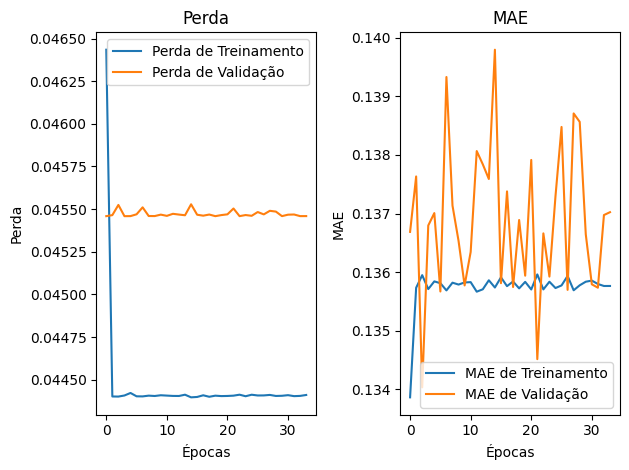

In [170]:
# Configuração do otimizador Adam com parâmetros padrão
adam_regressao = tf.keras.optimizers.Adam()
# Compilação do modelo de regressão
modelo_regressao.compile(optimizer=adam_regressao,  # Utilização do otimizador Adam
                         loss='mean_squared_error',  # Uso do erro quadrático médio como função de perda para regressão
                         metrics=['mae', 'mse'])  # Métricas incluem erro absoluto médio (MAE) e erro quadrático médio (MSE)

# Treinamento do modelo de regressão
history_regressao = modelo_regressao.fit(
    X_treino_scaled, y_treino_scaled,  # Dados de treinamento
    epochs=100,  # Número de épocas
    batch_size=32,  # Tamanho do lote
    validation_data=(X_validacao_scaled, y_validacao_scaled),  # Dados de validação
    callbacks=[reduce_lr, early_stopping],  # Callbacks para ajuste da taxa de aprendizado e parada antecipada
    verbose = 1
)

# Plot da perda de treinamento e validação
plt.subplot(1, 2, 1)
plt.plot(history_regressao.history['loss'], label='Perda de Treinamento')
plt.plot(history_regressao.history['val_loss'], label='Perda de Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Considerando 'mae' como métrica principal para o modelo de regressão
plt.subplot(1, 2, 2)
plt.plot(history_regressao.history['mae'], label='MAE de Treinamento')
plt.plot(history_regressao.history['val_mae'], label='MAE de Validação')
plt.title('MAE')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

In [171]:
# Previsões para regressão
y_pred_reg = modelo_regressao.predict(X_teste_scaled)
# Desnormalização das previsões de regressão
y_pred_reg_desnorm = scaler_y.inverse_transform(y_pred_reg)

# Desnormalização dos dados reais de teste para comparação
y_teste_reg_desnorm = scaler_y.inverse_transform(y_teste_scaled.reshape(-1, 1))

# Calculamos as métricas
mse_reg = mean_squared_error(y_teste_reg_desnorm, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)  # Calculando RMSE a partir do MSE
mae_reg = mean_absolute_error(y_teste_reg_desnorm, y_pred_reg)

print("\nRegressão:")
print("MSE:", mse_reg)
print("RMSE:", rmse_reg)
print("MAE:", mae_reg)

357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step

Regressão:
MSE: 26321568487118.945
RMSE: 5130454.99806001
MAE: 3388569.7507330575
